# Тестируем работу модели на изображении с камеры

 In this notebook, you will be using the LightGBM classifer you trained in the second notebook to prepare the necessary artifacts to opertionalize your model.

In [27]:
import os
from os import path
from glob import iglob
from PIL import Image, ImageOps
import numpy as np
import base64
import json
from io import BytesIO
import sys
import lightgbm as lgb
import shutil
from datetime import datetime
import boto3
import io

import keras
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
os.environ["KERAS_BACKEND"] = "cntk"

In [29]:
#!M
os.environ["AWS_SHARED_CREDENTIALS_FILE"] =  "./yc.config"
session = boto3.session.Session()
s3 = session.client(
    service_name='s3',
    endpoint_url='https://storage.yandexcloud.net'
)

def from_s3(bucket, key):
    file_byte_string = s3.get_object(Bucket=bucket, Key=key)['Body'].read()
    img = Image.open(io.BytesIO(file_byte_string))
    return img

You will use the new image as a test example to prepare your service.

In [30]:
test_image = 'car/test/3_60184_41.jpg'
# test_image = 'car/test/3_59296_27.jpg'

(960, 576)


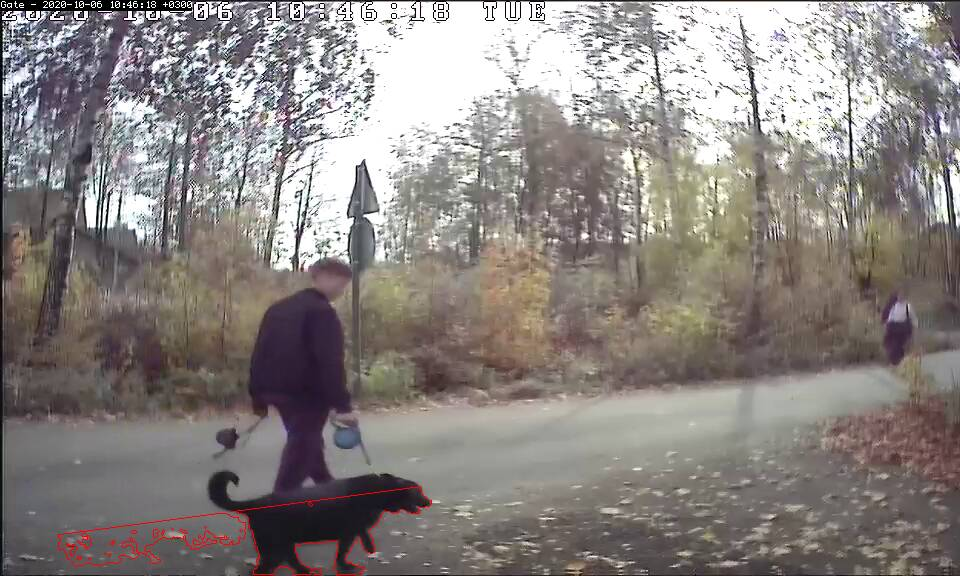

In [31]:

fail_pil_image = from_s3('smarthive', test_image)

print(fail_pil_image.size)
fail_pil_image

Now, you will load ResNet50 model and LightGBM classifer to make a prediction on the first fail image.

In [35]:
clf = lgb.Booster(model_file='lightgbm_classifier.model')
model = ResNet50(weights='imagenet',  input_shape=(224, 224, 3))
img = from_s3('smarthive', test_image).resize((224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred = model.predict(x).squeeze()  
feat = pred.reshape(1, pred.shape[0])
resp = clf.predict(feat)
resp

array([0.31191347])